<a href="https://colab.research.google.com/github/bahti21/transcriptomika/blob/main/hometask4_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1
Please, code (without using ready-to-go single-cell tools) one of the following dimensionality reduction and describe similarities / dissimilarities with PCA in resulting embedding. Feel free in methods and interpretation — creativity is a key:

LDA,
VAE,
ICA.

Этапы
1. Загрузить данные
2. Выполните ICA. Уменьшите размеры с помощью ICA.
3. Сравните с PCA.

In [9]:
!pip install scanpy[leiden] scrublet openTSNE snapatac2
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

  Using cached scanpy-1.10.2-py3-none-any.whl (2.1 MB)
  Using cached scrublet-0.2.3-py3-none-any.whl (15 kB)
  Using cached openTSNE-1.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached snapatac2-2.6.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.2 MB)
  Using cached anndata-0.10.8-py3-none-any.whl (124 kB)
  Using cached legacy_api_wrap-1.4-py3-none-any.whl (15 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
  Using cached session_info-1.0.0.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
  Using cached igraph-0.11.6-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
  Using cached annoy-1.17.3.tar.gz (647 kB)
  Preparing metadata (setup.py) ... done
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached mul

In [7]:
import scanpy as sc
import snapatac2 as snap

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sc.set_figure_params(dpi=150)
sns.set_style("ticks")

ModuleNotFoundError: No module named 'scanpy'

In [8]:
adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS","RPL"))

sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt", "ribo"],
    inplace=True,
    log1p=False,
    percent_top=None,
)

NameError: name 'sc' is not defined

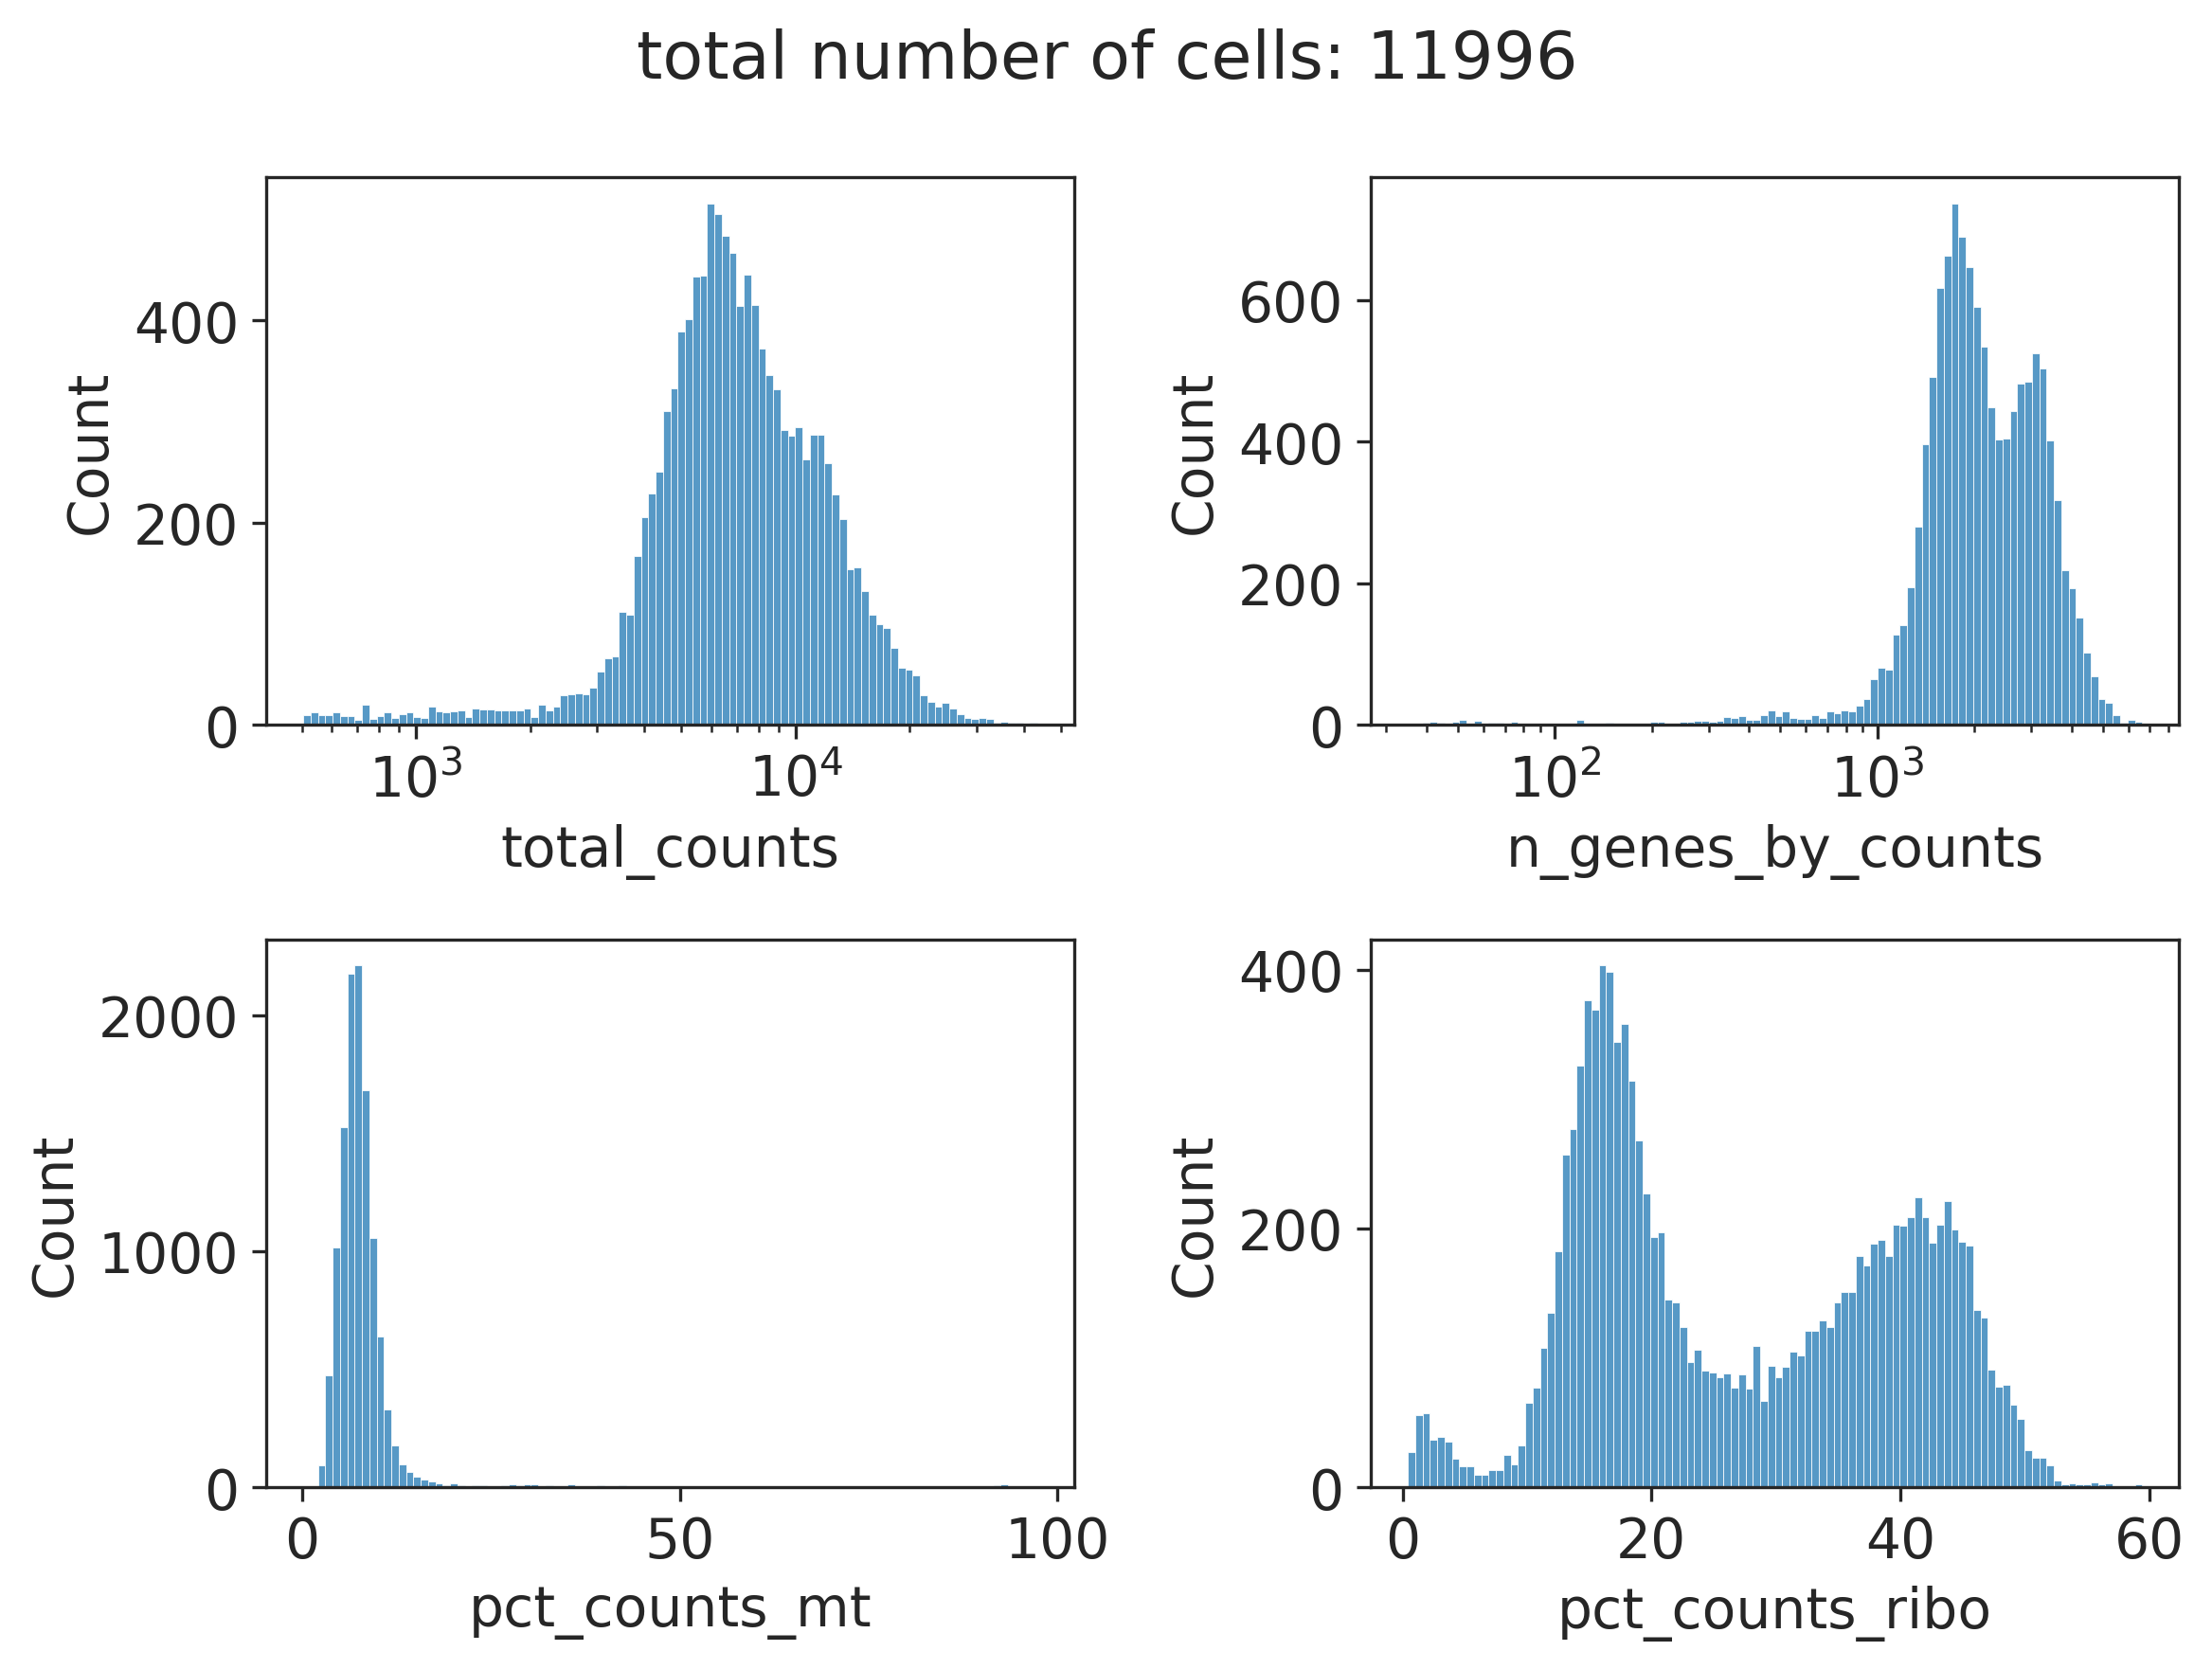

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6))

sns.histplot(adata.obs.total_counts, ax=axes[0, 0], log_scale=True, bins=100)
sns.histplot(adata.obs.n_genes_by_counts, ax=axes[0, 1], log_scale=True, bins=100)
sns.histplot(adata.obs.pct_counts_mt, ax=axes[1, 0], bins=100)
sns.histplot(adata.obs.pct_counts_ribo, ax=axes[1, 1], bins=100)

plt.suptitle(f"total number of cells: {len(adata)}")

fig.tight_layout()

In [37]:
sc.pp.scrublet(adata)

In [38]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [39]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
adata.raw = adata

adata = adata[:, adata.var.highly_variable]

In [40]:
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


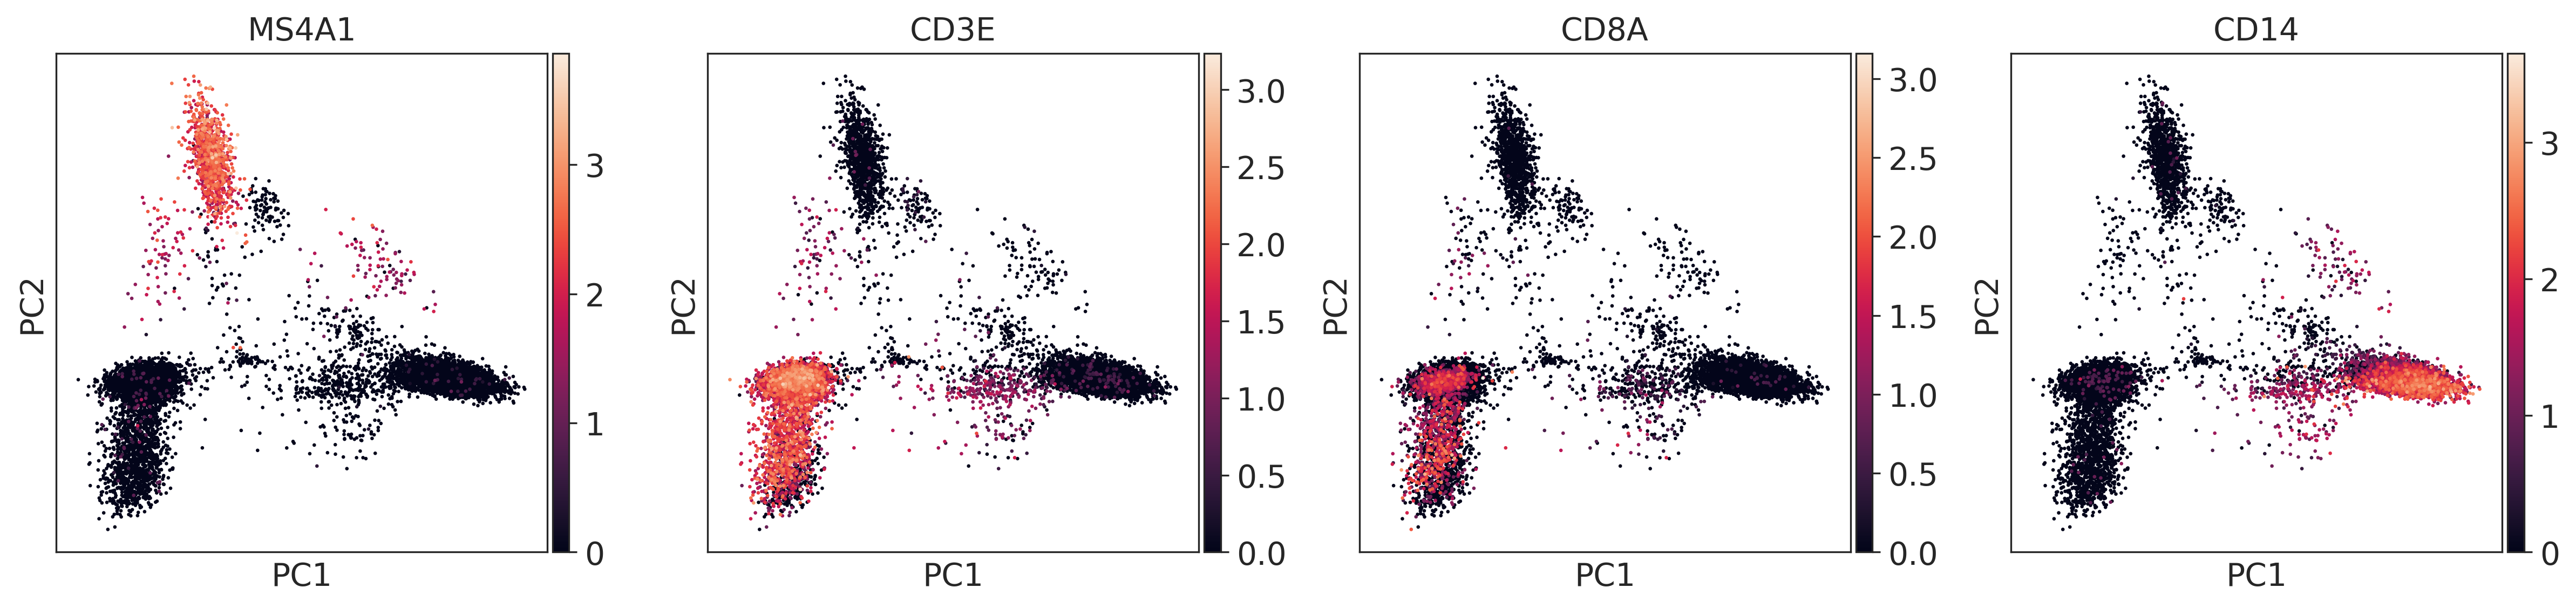

In [41]:
sc.pp.pca(adata)
sc.pl.pca(adata, color=["MS4A1", "CD3E", "CD8A", "CD14"])

In [42]:
sc.pp.neighbors(adata, use_rep="X_pca", n_pcs=20)

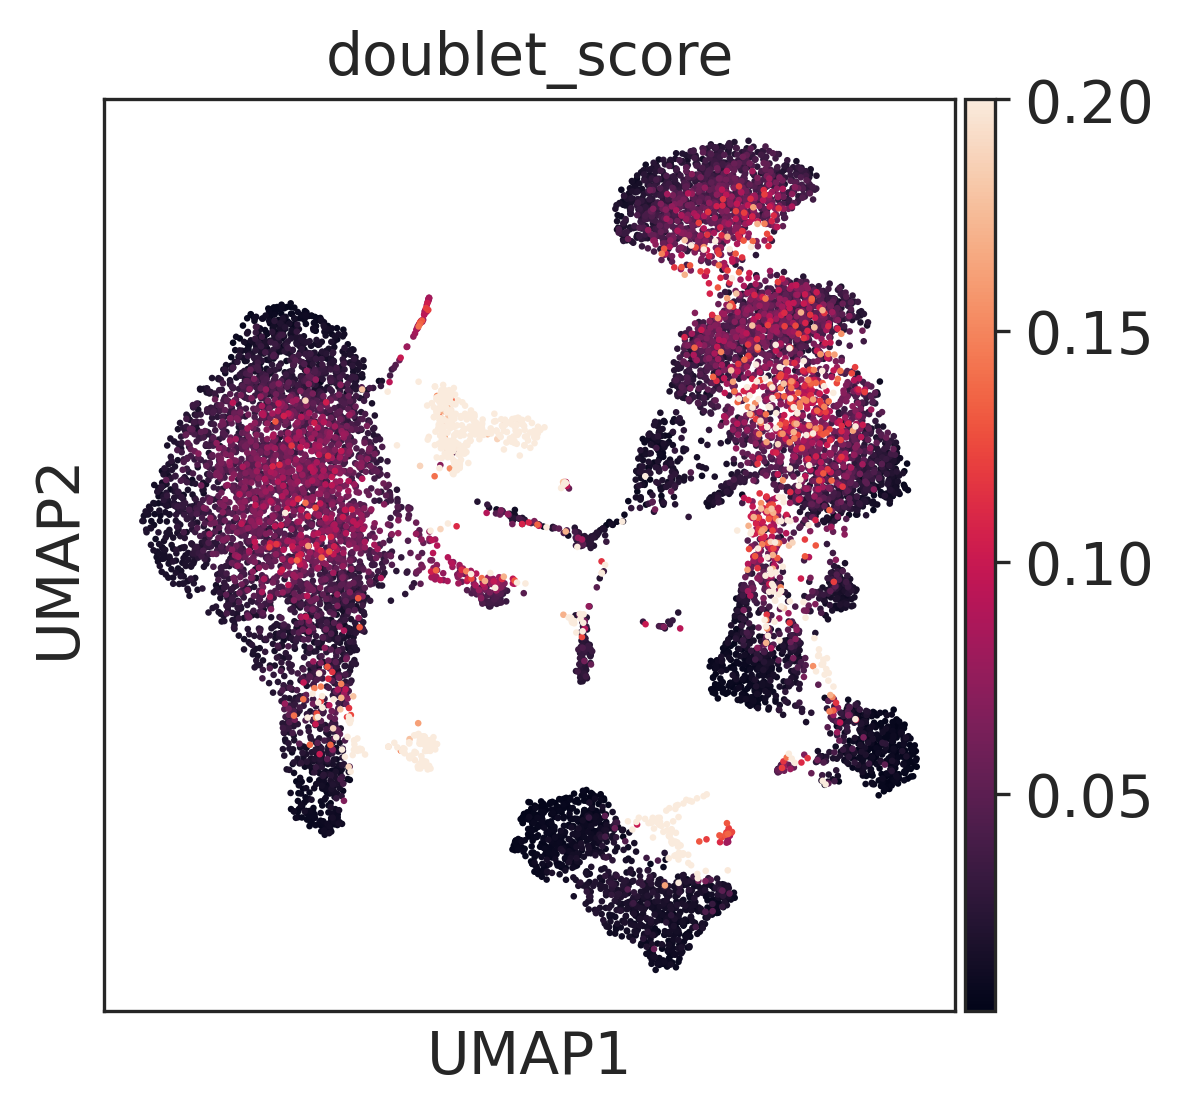

In [43]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=["doublet_score"], vmax=0.2)

/usr/local/lib/python3.10/dist-packages/snapatac2/tools/_embedding.py:292: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['spectral_eigenvalue'] = evals


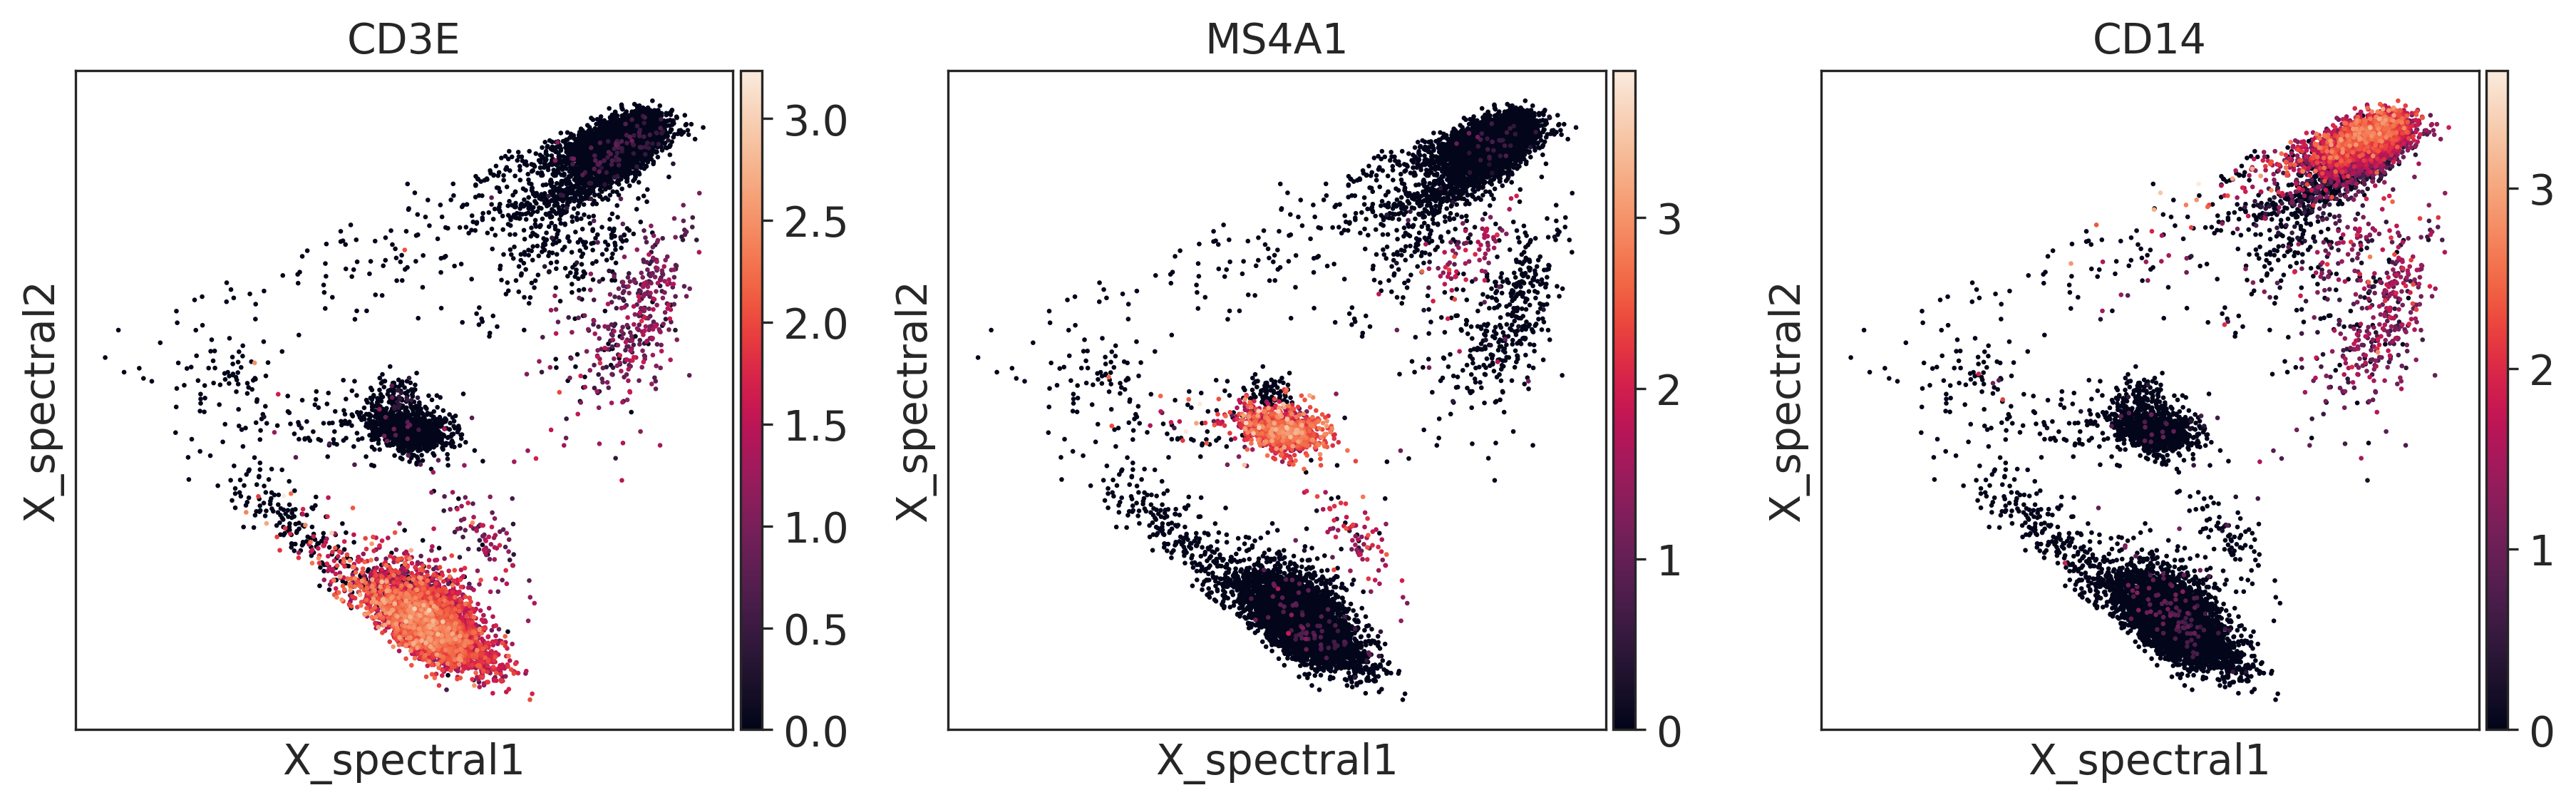

In [44]:
adata = adata.raw.to_adata()
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

snap.tl.spectral(adata, features=None)
sc.pl.embedding(adata, basis="X_spectral", color=["CD3E", "MS4A1", "CD14"])

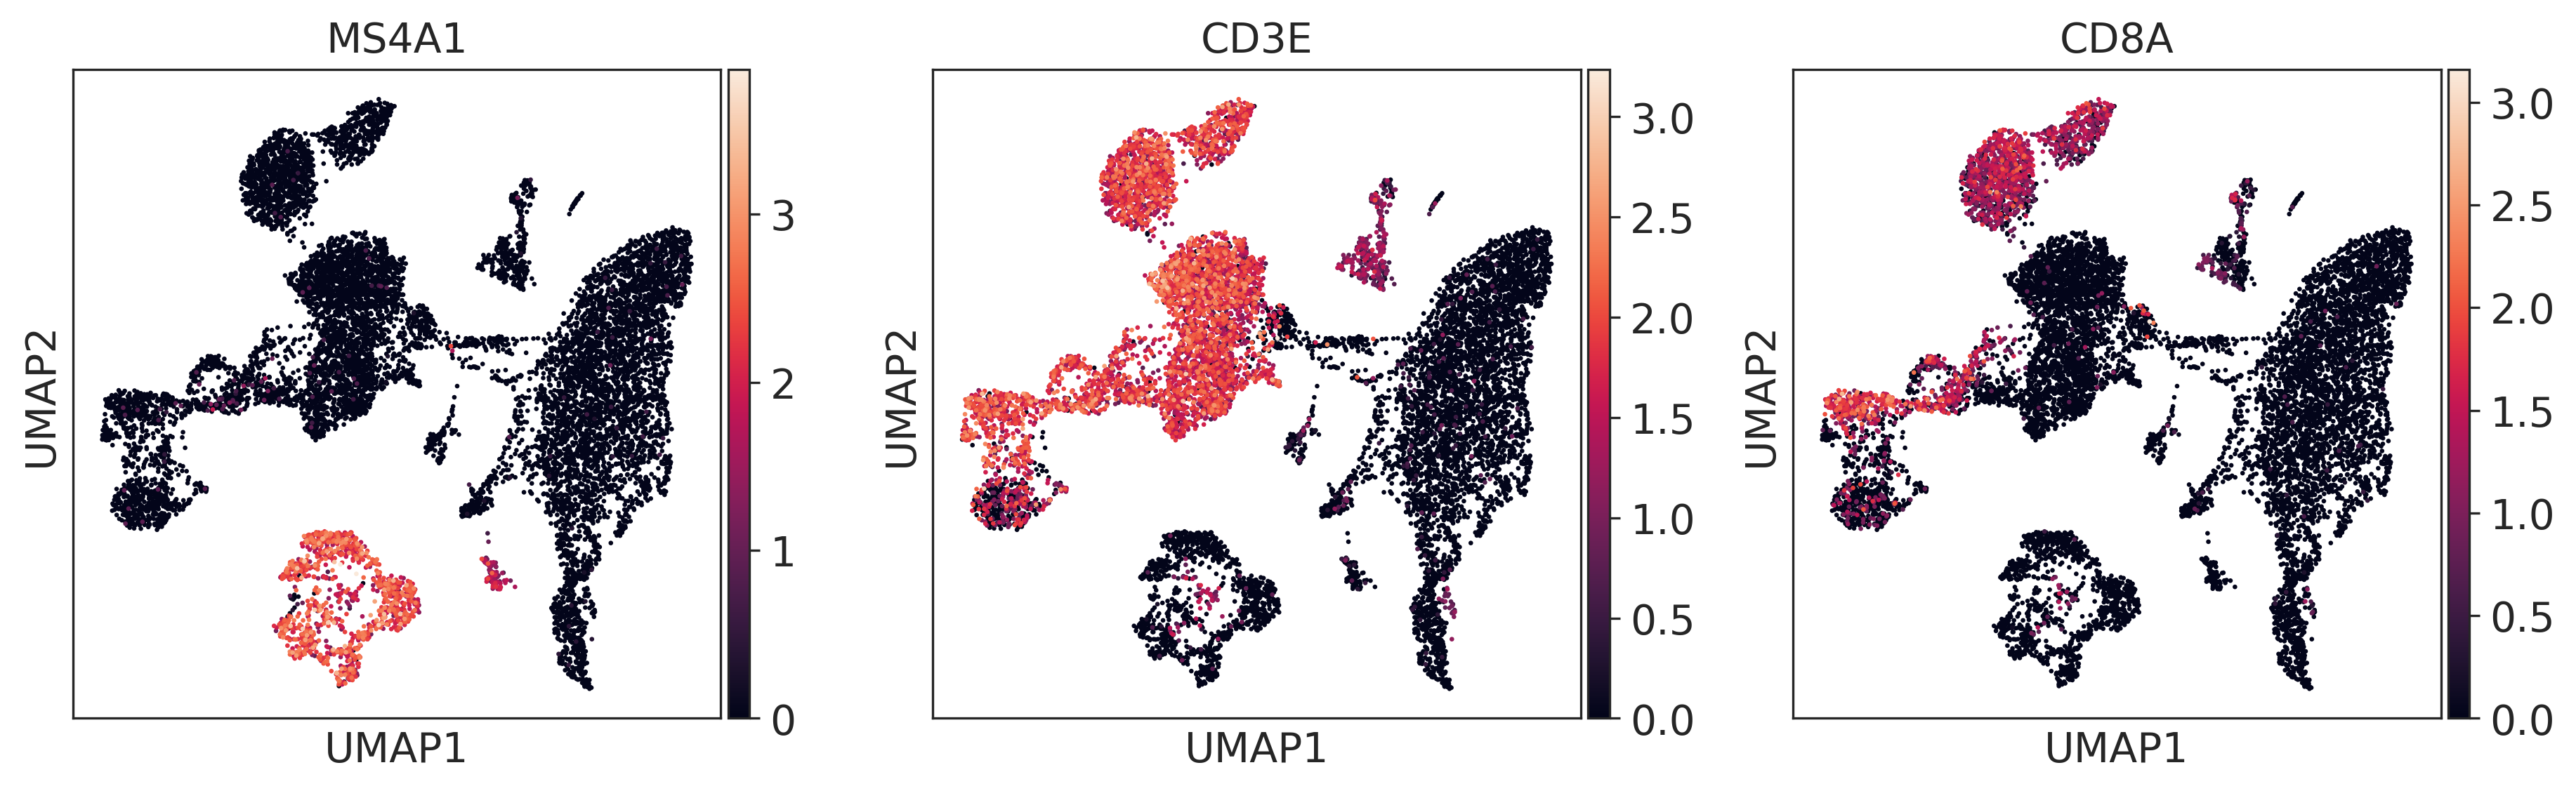

In [45]:
sc.pp.neighbors(adata, use_rep="X_spectral", n_pcs=20)

sc.tl.umap(adata)
sc.pl.umap(adata, color=["MS4A1", "CD3E", "CD8A"])

In [13]:
!pip install python-igraph louvain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


KeyError: 'louvain'

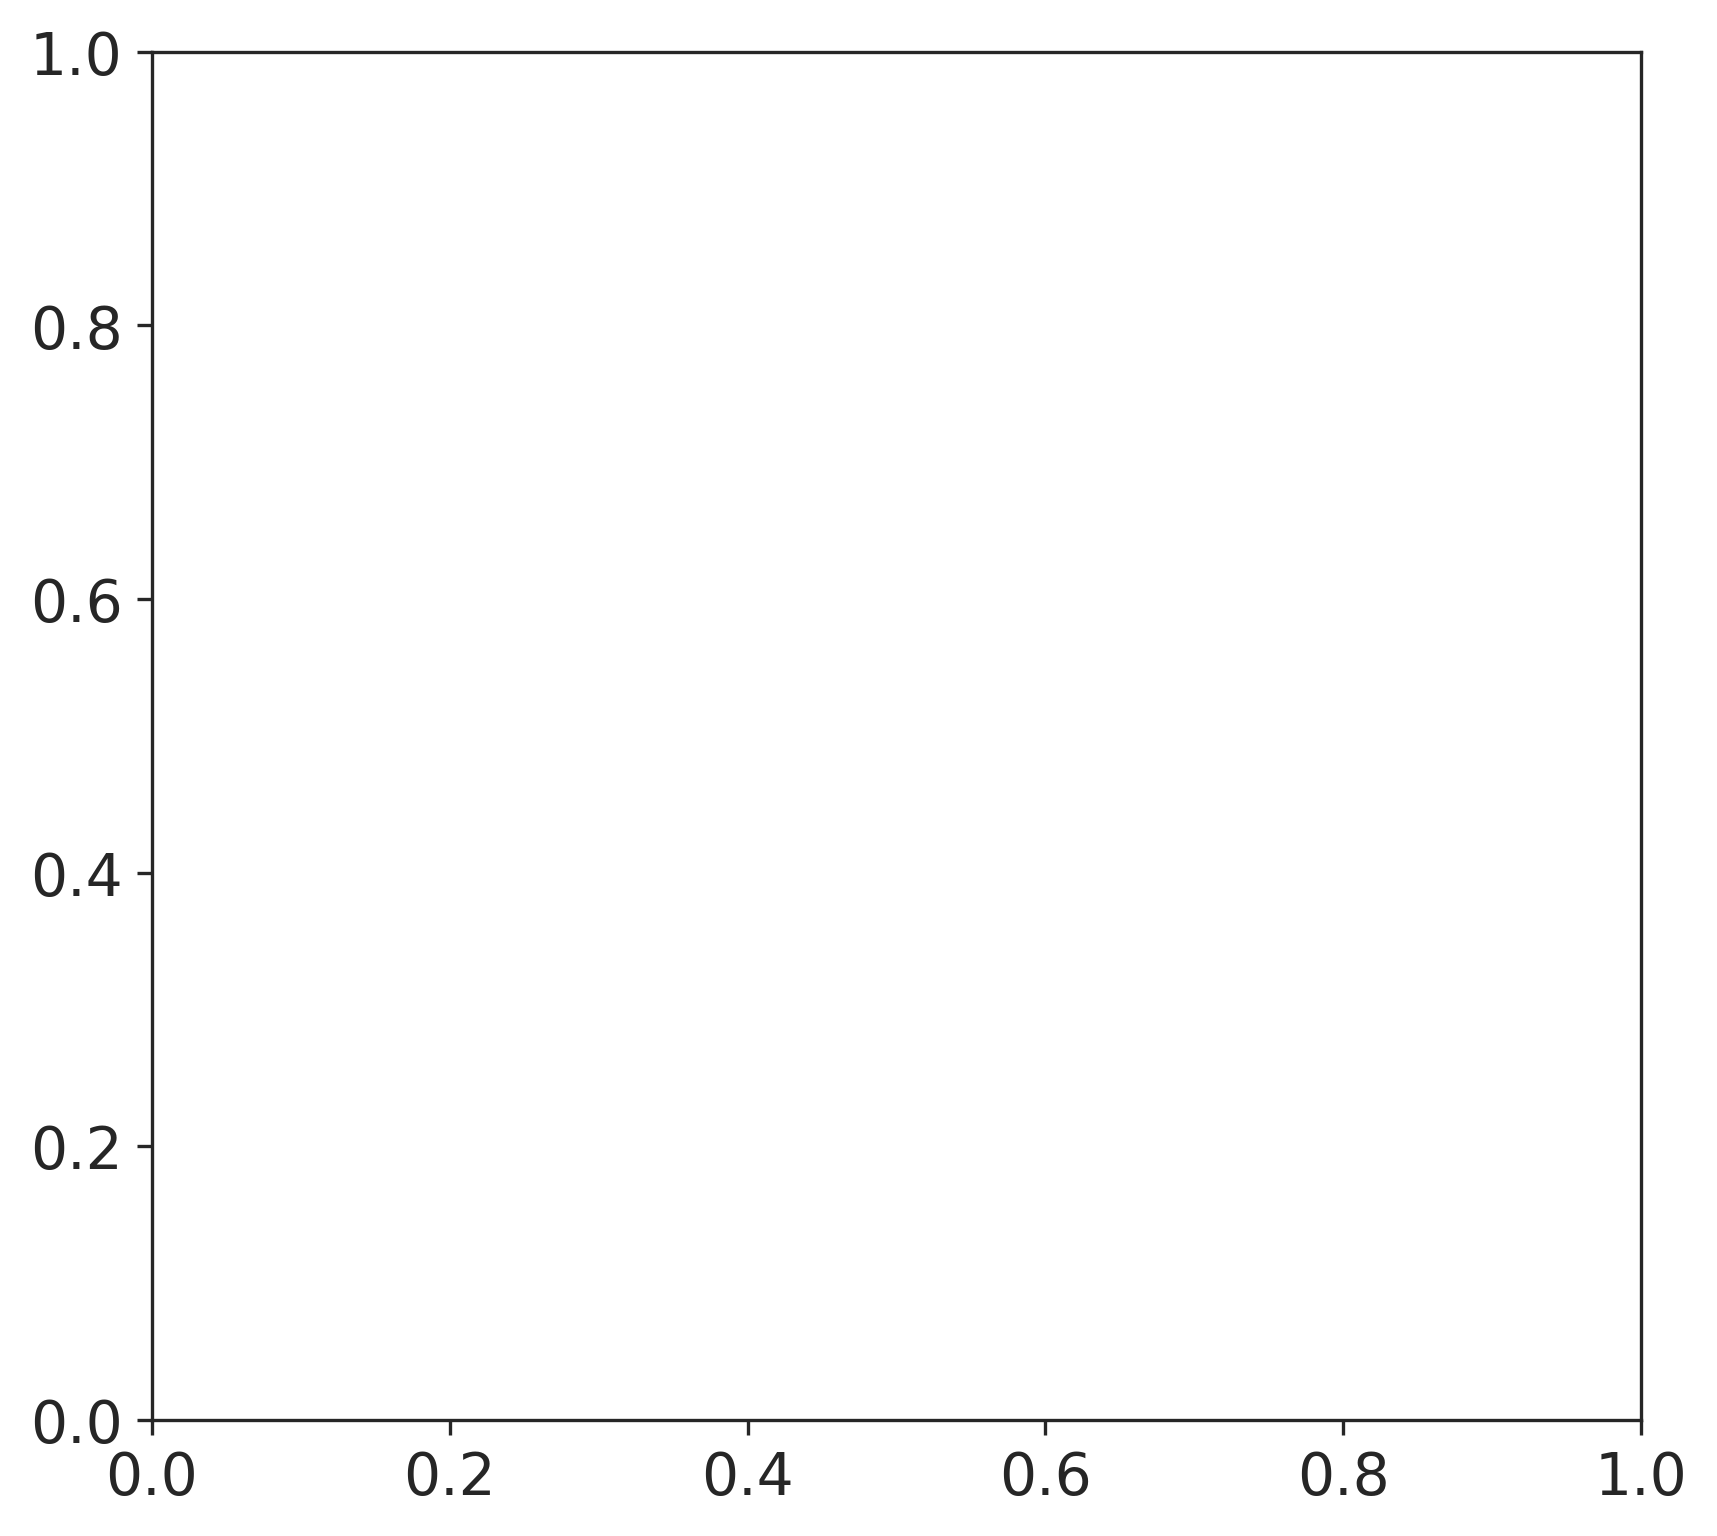

In [14]:
import scanpy as sc
import snapatac2 as snap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FastICA

# Установка параметров визуализации
sc.set_figure_params(dpi=150)
sns.set_style("ticks")

# Загрузка данных
#!pip install scanpy[leiden] scrublet openTSNE snapatac2
#!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
#!unzip PBMC_10k.zip

# Чтение данных
adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

# Обозначение митохондриальных и рибосомальных генов
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS","RPL"))

# Вычисление метрик QC
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt", "ribo"],
    inplace=True,
    log1p=False,
    percent_top=None,
)

# Нормализация данных
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Применение ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X)

# Визуализация эмбеддингов PCA и ICA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=adata.obs['louvain'].astype(int), cmap='viridis', s=10, alpha=0.7)
plt.title('PCA Embedding')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=adata.obs['louvain'].astype(int), cmap='viridis', s=10, alpha=0.7)
plt.title('ICA Embedding')
plt.xlabel('IC1')
plt.ylabel('IC2')

plt.show()

# Описание сходств и различий
description = """
Сходства:
- И PCA, и ICA уменьшают размерность набора данных.
- Оба метода помогают визуализировать данные в низкомерном пространстве.

Отличия:
- PCA максимизирует дисперсию и находит ортогональные компоненты, тогда как ICA фокусируется на статистической независимости компонентов.
- Компоненты PCA некоррелированы, тогда как компоненты ICA независимы.
- ICA может захватывать более сложные структуры и чувствителен к негауссовским распределениям.
"""
print(description)


In [51]:
!pip install python-igraph louvain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.0 MB/s eta 0:00:00


In [16]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.datasets import load_iris

# загрузка данных
data = load_iris()
X = data.data
adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
# выполним PCA
pca = PCA(n_components=2)
adata.obsm['X_pca'] = pca.fit_transform(adata.X)

# выполним ICA
ica = FastICA(n_components=2)
adata.obsm['X_ica'] = ica.fit_transform(adata.X)

# график результатов
plt.figure(figsize=(12, 6))

# график PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='viridis', edgecolor='k')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

# график ICA
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=data.target, cmap='viridis', edgecolor='k')
plt.title('ICA')
plt.xlabel('IC1')
plt.ylabel('IC2')

plt.tight_layout()
plt.show()

# сходства и различия
description = """
Сходства:
- И PCA, и ICA уменьшают размерность набора данных.
- Оба метода помогают визуализировать данные в низкомерном пространстве.

Отличия:
- PCA максимизирует дисперсию и находит ортогональные компоненты, тогда как ICA фокусируется на статистической независимости компонентов.
- Компоненты PCA некоррелированы, тогда как компоненты ICA независимы.
- ICA может захватывать более сложные структуры и чувствителен к негауссовским распределениям.
"""
print(description)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.